In [18]:
# Cell 1
import pandas as pd

# Prepare DataFrame
df = pd.read_csv('../data/BCCC-CIRA-CIC-DoHBrw-2020.csv')

In [19]:
# Cell 2
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder

# Explorative Data Analysis

# Check for null values
#print(df.isnull().sum())

# Fill null values with mean
if df.isnull().sum().sum() > 0:
    df = df.fillna(df.mean())

# Encode categorical data
encoder = LabelEncoder()
df['Label'] = encoder.fit_transform(df['Label'])

print(df['Label'].head())
print(encoder.classes_)

df.describe()

# svm

# Multi colinearity - maybe remove repeated

# the input to variance_inflation_factor should be a dataframe of all numeric, non-categorical variables
# numeric_df = df_encoded.select_dtypes(include=[np.number])

# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]
# vif["features"] = numeric_df.columns

# print(vif)

# Pairplot
#sns.pairplot(df_encoded, vars=[])


0    0
1    1
2    1
3    0
4    0
Name: Label, dtype: int32
['Benign' 'Malicious']


,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,PacketLengthSkewFromMedian,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
count,4.991060e+05,4.991060e+05,4.991060e+05,4.991060e+05,4.991060e+05,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,...,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000
mean,4.020093e+04,4.733915e+04,4.250156e+04,3.166829e+04,9.263585e+04,220.169083,173.159814,95.472702,70.749953,0.442934,...,0.972995,1.711825,0.319586,0.442021,0.394671,0.205894,-0.968984,-0.060800,1.114611,0.500000
std,1.439617e+05,4.212751e+05,1.393927e+05,2.566805e+05,1.534938e+05,210.141825,85.506490,32.999740,14.830277,1.551998,...,0.520212,11.106412,1.244031,2.071807,2.351233,1.724873,3.163775,3.198770,1.735820,0.500001
min,5.500000e+01,1.464903e+00,5.400000e+01,1.576245e+00,0.000000e+00,0.000000,56.000000,54.000000,54.000000,-10.000000,...,0.077182,0.000000,0.000000,0.000005,0.000002,-0.000001,-10.000000,-10.000000,0.000000,0.000000
25%,6.180000e+02,5.410781e+01,4.760000e+02,1.418128e+02,4.692099e+02,21.661253,92.000000,76.000000,66.000000,0.199848,...,0.577836,0.000021,0.004454,0.010538,0.012238,0.000016,-1.797168,0.393686,0.552687,0.000000
50%,1.807000e+03,3.640969e+02,4.827000e+03,4.611146e+02,1.826789e+04,135.142971,152.488283,87.000000,68.000000,0.986397,...,0.748184,0.000079,0.008820,0.015148,0.015407,0.000034,0.000000,0.908002,0.800649,0.500000
75%,5.542000e+03,3.810260e+03,7.888000e+03,4.215498e+03,1.415989e+05,376.296309,228.758621,105.000000,68.000000,1.201609,...,1.516263,0.000357,0.018640,0.024903,0.016300,0.015161,0.936908,1.305393,1.208105,1.000000
max,8.015359e+06,2.304348e+07,7.723184e+06,7.600000e+06,1.578115e+06,1256.230616,689.800000,317.000000,553.000000,2.932375,...,5.616085,647.245330,25.441017,28.017596,28.017596,28.017596,2.970716,5.428781,66.309747,1.000000


In [20]:
# Cell 3: Neural network implementation

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

# Separate features and target
X = df.drop('Label', axis=1)
y = df['Label']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model with regularization
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


C:\Users\edoto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [22]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
9983/9983 ━━━━━━━━━━━━━━━━━━━━ 10s 870us/step - accuracy: 0.9383 - loss: 0.3241 - val_accuracy: 0.9792 - val_loss: 0.1196
Epoch 2/50
9983/9983 ━━━━━━━━━━━━━━━━━━━━ 8s 830us/step - accuracy: 0.9761 - loss: 0.1260 - val_accuracy: 0.9785 - val_loss: 0.0981
Epoch 3/50
9983/9983 ━━━━━━━━━━━━━━━━━━━━ 8s 813us/step - accuracy: 0.9805 - loss: 0.1051 - val_accuracy: 0.9853 - val_loss: 0.0843
Epoch 4/50
9983/9983 ━━━━━━━━━━━━━━━━━━━━ 8s 824us/step - accuracy: 0.9827 - loss: 0.0951 - val_accuracy: 0.9840 - val_loss: 0.0840
Epoch 5/50
9983/9983 ━━━━━━━━━━━━━━━━━━━━ 8s 798us/step - accuracy: 0.9836 - loss: 0.0893 - val_accuracy: 0.9853 - val_loss: 0.0769
Epoch 6/50
9983/9983 ━━━━━━━━━━━━━━━━━━━━ 8s 821us/step - accuracy: 0.9842 - loss: 0.0859 - val_accuracy: 0.9869 - val_loss: 0.0752
Epoch 7/50
9983/9983 ━━━━━━━━━━━━━━━━━━━━ 8s 827us/step - accuracy: 0.9840 - loss: 0.0840 - val_accuracy: 0.9845 - val_loss: 0.0777
Epoch 8/50
9983/9983 ━━━━━━━━━━━━━━━━━━━━ 8s 802us/step - accuracy: 0.9848 

In [23]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

3120/3120 ━━━━━━━━━━━━━━━━━━━━ 2s 683us/step - accuracy: 0.9910 - loss: 0.0554
Test Accuracy: 99.07%


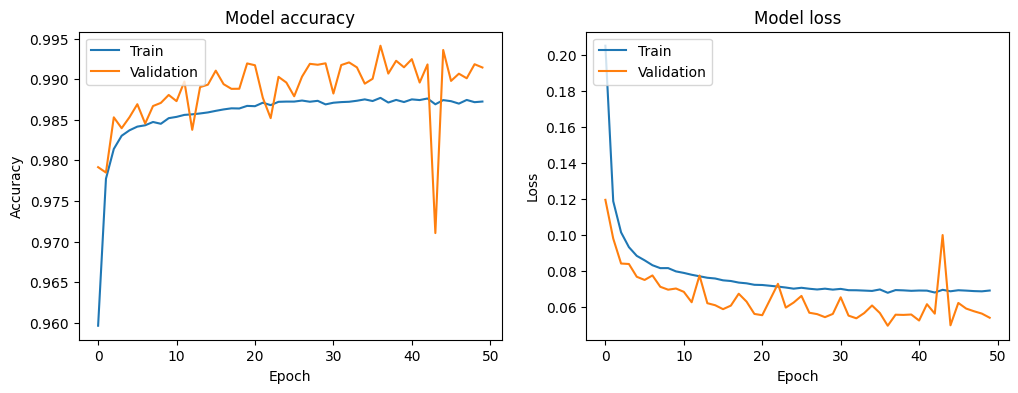

In [24]:
# Plot training & validation accuracy and loss values
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()